# ATSC 409 Assignment 4 Problem RK4

MSE for forward Euler method is 6.75360342034e-07
MSE for midpoint method is 1.89459366966e-10
MSE for RK4 method is 2.28358465602e-16


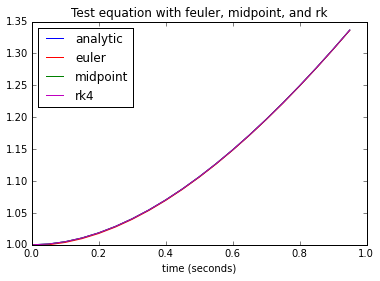

In [34]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,rk4ODEinter41
                                        
##### Prepare for example eq:test.
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)

##### Set up lists for approximated values (e=euler, m=midpoint, rk=rk4).
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)

##### Obtain approximated y values.
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
    
##### Obtain exact values.
analytic=timeVec + np.exp(-timeVec)

##### Construct plots.
theFig=plt.figure(0)
theFig.clf()
theAx=theFig.add_subplot(111)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,ye,'r-',label='euler')
l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('Test equation with feuler, midpoint, and rk')

##### Take mean squared error between approximation and exact values.
me = np.ndarray(20)
mm = np.ndarray(20)
mr = np.ndarray(20)
for i in range(0,20):
    me[i] = analytic[i] - ye[i]
    mm[i] = analytic[i] - ym[i]
    mr[i] = analytic[i] - yrk[i]
mspe_e = np.mean(me**2)
print('MSE for forward Euler method is ' + str(mspe_e))
mspe_m = np.mean(mm**2)
print('MSE for midpoint method is ' + str(mspe_m))
mspe_r = np.mean(mr**2)
print('MSE for RK4 method is ' + str(mspe_r))

Here, we generate solutions to the test problem dy/dt = -y+t+1 where y(0) = 1 with the forward Euler method, the midpoint method, and the fourth-order Runge-Kutta (RK4) method. Graphically, it is difficult to evaluate the performance of the three methods as the curves from the numerical solutions appear to be one with the curve from the analytical or true solution. Hence, we look to the mean squared error as our choice of metric in assessing accuracy. The RK4 method yields the smallest MSE of 2.2e-16 and therefore is the most accurate of the three. Repeating this exercise with a halved stepsize of 0.025 produces MSEs of about 6e-8, 4e-12, and 4e-19 for the forward Euler, midpoint, and RK4 methods, respectively. Notice that reducing the stepsize by 1/2 reduced the MSEs by 10^-1 for the 1st-order accurate forward Euler method, 10^-2 for the second-order accurate midpoint method, and 10^-3 for the 4th-order RK method. The fact that these MSEs are considerably lower than the MSEs from the simulation with twice the current stepsize further validates the belief that decreasing the stepsize would increase accuracy. Ranking the three methods in terms of accuracy, we deem the forward Euler the worst, the midpoint method the second best, and the RK4 the best. 

#ATSC 409 Assignment 4 Problem Embedded

MSE for RK4 method is 2.28358465602e-16
MSE for embedded RK4 method is 1.39164208832e-22


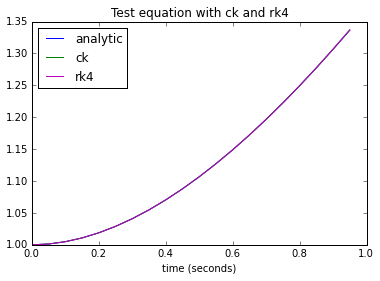

In [35]:
from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41

##### Prepare for example eq:test.
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)

##### Set up lists for approximated values (rk=rk4, rkck=embedded rk).
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)

##### Obtain approximated y values.
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
    
##### Obtain exact values.
analytic=timeVec + np.exp(-timeVec)

##### Construct plots.
theFig,theAx=plt.subplots(1,1)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,yrkck,'g-',label='ck')
l3=theAx.plot(timeVec,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('Test equation with ck and rk4')

##### Take mean squared error between approximation and exact values.
mrk = np.ndarray(20)
mrkck = np.ndarray(20)
for i in range(0,20):
    mrk[i] = analytic[i] - yrk[i]
    mrkck[i] = analytic[i] - yrkck[i]
mspe_rk = np.mean(mrk**2)
print('MSE for RK4 method is ' + str(mspe_rk))
mspe_rkck = np.mean(mrkck**2)
print('MSE for embedded RK4 method is ' + str(mspe_rkck))

Here, we generate solutions to the test problem dy/dt = -y+t+1 where y(0) = 1 with the standard fourth-order Runge-Kutta (RK4) method and the embedded Cash-Karp (CK) scheme. Again, a graphical evaluation of the solutions does not suffice so  we use mean squared error to assess accuracy. The CK method yields the smaller MSE of 1.4e-22 and therefore is more accurate than the RK4 (MSE of 2.2e-16). Repeating this exercise with a halved stepsize of 0.025 produces MSEs of about 4e-19 and 7e-26 for the RK4 and CK methods respectively. Notice that reducing the stepsize by 1/2 reduced the MSEs by 10^-3 for the standard 4th-order RK method and 10^-4 for the 5th-order CK method. Again, the fact that these MSEs are considerably lower than the MSEs from the simulation with twice the current stepsize further validates the belief that decreasing the stepsize would increase accuracy. Also it's interesting how the MSE for the kth-order method was reduced by 10^(k-1) after halving the stepsize. Ranking the two methods in terms of accuracy, we say the CK scheme is more accurate than the standard RK4.

#ATSC 409 Assignment 4 Problem Coding A

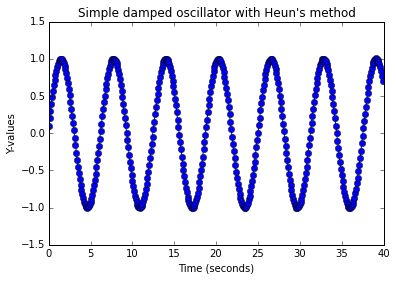

In [36]:
from numlabs.lab4.example.test import read_init, derivs4

##### Prepare for harmonic oscillator.
coeff=read_init('Assign_04.json')
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time)
soln=np.empty([nsteps], 'float')

##### Write a routine that solves the harmonic oscillator with Heun's method.
def heun(coeff, y, derivs):
    k1 = coeff.dt * derivs(coeff,y)
    k2 = coeff.dt * derivs(coeff,y + ((2.0/3.0) * k1))
    ynew = y + (1.0/4.0) * (k1 + (3.0 * k2))
    return ynew

##### Compute the solution.
for i in range(nsteps):
    y=heun(coeff,y,derivs4)
    soln[i]=y[0]

##### Construct plots.
theFig,theAx=plt.subplots(1,1)
theAx.plot(time,soln,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('Time (seconds)')
theAx.set_ylabel('Y-values')
plt.show()

#ATSC 409 Assignment 4 Problem Coding B

Difference between midpoint and heun is 0.0


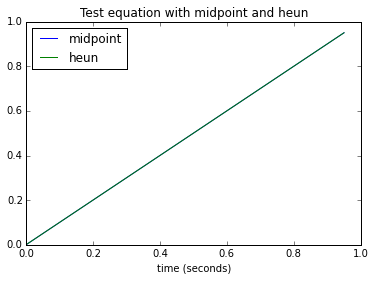

In [37]:
from numlabs.lab4.lab4_functions import initinter41, derivsinter41, midpointinter41

##### Write a function that computes the solution using Heun's method.
def heun(coeff, y, theTime):
    k1 = coeff.dt * derivsinter41(coeff,y,theTime)
    k2 = coeff.dt * derivsinter41(coeff,y + (2.0/3.0 * k1), theTime + (2.0/3.0)*coeff.dt)
    y = y + (1.0/4.0) * (k1 + (3.0 * k2))
    return y
                                        
##### Prepare for example eq:test.
initialVals={'yinitial': 0,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)

##### Set up lists for approximated values (m=midpoint, h=heun).
ym=[]
yh=[]
y=coeff.yinitial
ym.append(coeff.yinitial)
yh.append(coeff.yinitial)

##### Obtain approximated y values.
for i in np.arange(1,nsteps):
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=heun(coeff,y,timeVec[i-1])
    yh.append(ynew)
    y=ynew

##### Construct plots.
theFig=plt.figure(0)
theAx=theFig.add_subplot(111)
l1=theAx.plot(timeVec,ym,'b-',label='midpoint')
l2=theAx.plot(timeVec,yh,'g-',label='heun')
theAx.set_xlabel('time (seconds)')
theAx.legend(loc='best')
theAx.set_title('Test equation with midpoint and heun')

##### Find the difference between midpoint and heun approximations.
diff = np.ndarray(20)
for i in range(0,20):
    diff[i] = yh[i] - ym[i]
diff = np.mean(diff**2)
print('Difference between midpoint and heun is ' + str(diff))

Here, we use the midpoint method and Heun's method to generate solutions to the test problem dy/dt = f(y,t) = t-y+1 where the y at t=0 is either 0 or 1. Setting the initial condition to either 0 or 1 leads to the same result, which is that the two methods give the exact same solution. After altering the initial condition several times more, we begin to infer that the midpoint method and Heun's method are equivalent in approximating the test equation. It seems that the initial condition is arbitrary as long as y at t=0 is some real number beta. We then investigate this behaviour by algebraically deriving explicit expressions for y(n+1) in terms of y(n), t(n), and h for both methods (please see handwritten assignment for the derivation). Despite the different steps taken in the methods, it turns out that the two methods give the exact same expression for y(n+1). In conclusion, there is no difference between the two methods when applied to the test equation regardless of the initial condition, and there shouldn't be. However, if we set the value of the "yinitial" key in the "initialVals" dictionary above to 12, we see a difference of 1.6e-31. This difference is trivial and is inevitably caused by roundoff error.